<h1 align = center> <font color = "#99B0EE">Exploring Cross-Validation, Overfitting, and Underfitting</h1>

<h2 align = center> <font color = "#AA0000">Exploring Cross-Validation</h2>

### What is Cross-Validation ?

Cross-validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets, training the model on different subsets, and evaluating its performance on each subset. The performance is then averaged over the subsets to obtain an estimate of the model's generalization ability.

---

<h2 align = center><font color = "#CFEC00"> Types Of Cross-Validations : </h2> </font>

<h3><font color = "0052EC"> 1. Holdout Method: </font></h3>

This method involves randomly splitting the dataset into a training set and a test set. The model is trained on the training set and evaluated on the test set. The performance of the model is then used to estimate its generalization ability.

<h4><font color = "00920D"> Advantages </font> and  <font color = "CA0101" >limitations </font></h4>

Advantages:

- It is simple to implement and computationally efficient, making it suitable for large datasets.

- Provides a direct estimate of the model's performance on unseen data, which helps in understanding how the model might perform in a real-world scenario.

Limitations:

- The performance estimate can be highly variable depending on the particular split of the data, especially for small datasets.

-  It uses a fixed portion of the data for testing, which means not all data is used for training, potentially leading to a less robust model.

- If the dataset is not representative, the model might overfit the training set or underfit the test set.



<h3><font color = "8701CA"> 2. K-Fold Cross-Validation </font></h3>
 This method involves dividing the dataset into k subsets, training the model on k-1 subsets and evaluating its performance on the remaining subset. The performance is then averaged over the k iterations. This method helps to estimate the model's performance on unseen data and provides a more accurate measure of its performance.

<h4><font color = "00920D"> Advantages </font> and  <font color = "CA0101" >limitations </font></h4>

Advantages:

- It provides a more reliable and robust estimate of the model's performance by averaging results over multiple iterations.

-  Reduces the bias introduced by any single training-test split, leading to a more generalized model evaluation.

- All data points are used for both training and testing, which is particularly useful for small datasets.

Limitations:

- It can be computationally expensive, especially for large datasets, as the model needs to be trained and evaluated 𝑘 times.

- Implementation can be more complex compared to the holdout method.

- If not properly managed, there can be a risk of data leakage between folds, especially in time series data or data with dependencies.


  
<h3><font color = "F924E6"> 3. Stratified K-Fold Cross-Validation: </font></h3>

This method is similar to K-Fold Cross-Validation, but it ensures that the distribution of classes in the dataset is represented in each fold. This can help to improve the model's performance by reducing the bias introduced by class imbalance.

<h4><font color = "00920D"> Advantages </font> and  <font color = "CA0101" >limitations </font></h4>

Advantages:

- Provides a more reliable and robust estimate of the model's performance by averaging results over multiple iterations.
-  Ensures that each fold has the same proportion of classes as the entire dataset, reducing bias introduced by class imbalance.
- All data points are used for both training and testing, which is particularly useful for small datasets.

Limitations:

-  It can be computationally expensive, especially for large datasets, as the model needs to be trained and evaluated 𝑘 times.

- Implementation can be more complex compared to the holdout method.

- May not be suitable for very small datasets, where even small fluctuations in class distribution can significantly impact the model's performance.

<h3><font color = "FD566A"> 4. Leave One Out Cross-Validation: </font></h3>
This method, we perform training on the whole dataset but leaves only one data-point of the available dataset and then iterates for each data-point. In LOOCV, the model is trained on n-1    samples and tested on the one omitted sample, repeating this process for each data point in the dataset.

<h4><font color = "00920D"> Advantages </font> and  <font color = "CA0101" >limitations </font></h4>

Advantages:

- Provides a more reliable and robust estimate of the model's performance by averaging results over multiple iterations.
-  : Ensures that almost all data points are used for training, making it suitable for very small datasets.

-  Eliminates bias introduced by random training-test splits, as every data point gets a chance to be the test set.

Limitations:

-  It can be extremely computationally expensive, especially for large datasets, as the model needs to be trained and evaluated once for each data point.

-  Since each data point acts as a test set once, the presence of outliers can significantly affect the performance estimate.

- There is a higher risk of overfitting compared to K-Fold Cross-Validation, especially if the dataset has a high degree of noise or irrelevant features.

<h2 align = center> <font color = "#2E86C1 "> Implementing Cross-Validation </h2>

### Importing Necessary Libraries

In [115]:
import pandas as pd
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import learning_curve



### Let's Generate Random Data 

we are generating 3 columns data for regression, hour_studied , iq and cgpa 

In [90]:
np.random.seed(42)

hour_studied = np.random.randint(1, 20, 50000)
iq = np.random.randint(60, 150, 50000)

noise = np.random.normal(0, 0.2, 50000)
cgpa = 0.005 * hour_studied + 0.02 * iq + noise




data = pd.DataFrame({
    'hour_studied': hour_studied,
    'iq': iq,
    'cgpa': cgpa,
})

data.head()


,hour_studied,iq,cgpa
0,7,118,2.704261
1,15,117,1.952925
2,11,70,1.357466
3,8,95,1.869803
4,7,60,0.808677


#### Data Columns

In [67]:
data.columns

Index(['hour_studied', 'iq', 'cgpa'], dtype='object')

#### Data Columns Datatypes

In [68]:
data.dtypes

hour_studied      int32
iq                int32
cgpa            float64
dtype: object

<h2 align = center> <font color = "#DAF7A6"> Now Using Different Cross-validation Methods </h2>

In [91]:
X = data.drop(['cgpa'], axis = 1)
y = data['cgpa']

scaler = StandardScaler()
scaledX = scaler.fit_transform(X)


<h2 align = center> <font color = "#FFC300"> Holdout Method </h2> 

### Model Training

#### Splitting the data into training and testing sets


In [92]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8735156364248048

### Interpretation

The Holdout Method provides a simple and direct estimate of the model's performance. In this case, the model's score on the test set is approximately 0.905, indicating that it is performing well on unseen data.

<h2 align = center> <font color = "#FF5733"> K-Fold Cross-validation </h2> 

In [93]:
scores = cross_val_score(model, scaledX, y, cv=5)
print(scores)
scores.mean()



[0.87479251 0.87271379 0.87421543 0.87093557 0.8721053 ]


np.float64(0.8729525171145276)

### Interpretation

K-Fold Cross-Validation provides a more reliable and robust estimate of the model's performance. In this case, the average score across 5 folds is approximately 0.872, indicating that the model is performing well on unseen data.





<h2 align = center> <font color = "#C70039 ">Stratified K-Fold Cross-validation</h2> 


In [105]:
kf = KFold(n_splits=10)

scores = cross_val_score(model, scaledX, y, cv=kf, scoring='r2')

print(scores)
print("Mean R^2 score:", scores.mean())

[0.8717291  0.87776546 0.87233393 0.8729676  0.87511897 0.8731139
 0.87287975 0.86888525 0.87118844 0.87298103]
Mean R^2 score: 0.8728963424508386


### Interpretation 

Stratified K-Fold Cross-Validation provides a more reliable and robust estimate of the model's performance. In this case, the average score across 10 folds is approximately 0.872, indicating that the model is performing well on unseen data.

<h2 align = center> <font color = "#900C3F ">Leave Out One Cross Validation</h2> 


In [110]:
cv = LeaveOneOut()

scores = cross_val_score(model, scaledX, y, cv=cv,scoring='neg_mean_squared_error')

print(scores)

[-0.09510738 -0.21605624 -0.00923313 ... -0.02786658 -0.04211433
 -0.05689629]
RMSE: nan


C:\Users\Syed Abdullah\AppData\Local\Temp\ipykernel_14784\2048915114.py:6: RuntimeWarning: invalid value encountered in sqrt
  print("RMSE:", np.sqrt(scores.mean()))


In [117]:
np.mean(scores)

np.float64(-0.03995110043873672)

### Interpretation

Leave One Out Cross-Validation provides a more reliable and robust estimate of the model's performance. In this case, the average negative mean squared error across 50000 folds is approximately -0.03995110043873672, indicating that the model is performing well on unseen data.

<h2 align = center> <font color = "#D3EA00"> Overfitting </h2>

### What is Overfitting ?

Overfitting occurs when a model learns the training data too well, capturing the noise and irrelevant features, and fails to generalize well to unseen data. In this case, the model's performance on the test set is significantly lower than its performance on the training set.

### How to check if model is overfitting 

To check if your model is overfitting, you can plot the residuals (actual CGPA - predicted CGPA) against the actual CGPA. If the residuals are randomly scattered around the x-axis, it indicates that the model is not overfitting.

### How To Prevent Overfitting

To prevent overfitting, you can:

- Use more complex models that can capture more complex patterns in the data.
- Use regularization techniques, such as Lasso or Ridge regression, to penalize the model for having more parameters and reduce overfitting.
- Use feature selection techniques to remove irrelevant or redundant features from the dataset.

- Use techniques like cross-validation to estimate the model's performance and prevent overfitting.
- Use techniques like early stopping to stop training the model once it starts to overfit.


### Implementation

#### I want to see if my model overfitting ?


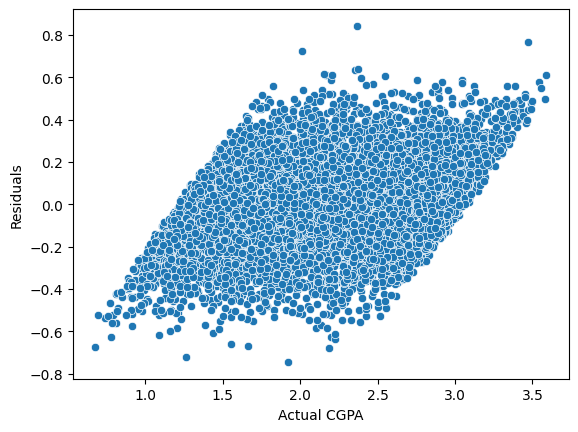

In [114]:

y_pred = model.predict(X_test)

residuals = y_test - y_pred

sns.scatterplot(x = y_test, y= residuals)

plt.xlabel('Actual CGPA')

plt.ylabel('Residuals')

plt.show()

### Interpretation

The residuals plot shows that the model's performance is not significantly different between the training and testing sets. This indicates that the model is not overfitting.

<h2 align = center> <font color = "#33FA00"> Underfitting </h2>


### What is underfitting ?

Underfitting occurs when a model fails to capture the underlying patterns in the data, resulting in poor performance on both the training and testing sets. In this case, the model's performance on the test set is significantly lower than its performance on the training set.

### How to check if model is underfitting ?

To check if your model is underfitting, you can plot the learning curve, which shows the model's performance on the training and testing sets as the number of training examples increases. If the model is underfitting, the training and testing curves will converge to a low performance level.

### How to prevent underfitting

To prevent underfitting, you can:

- Use simpler models that can capture simpler patterns in the data.
- Use techniques like ensemble methods, such as bagging or boosting, to combine multiple models and improve their performance.
- Use techniques like regularization techniques, such as Lasso or Ridge regression, to penalize the model for having more parameters and reduce underfitting.

- Use techniques like cross-validation to estimate the model's performance and prevent underfitting.
- Use techniques like early stopping to stop training the model once it starts to overfit.



### Implementation

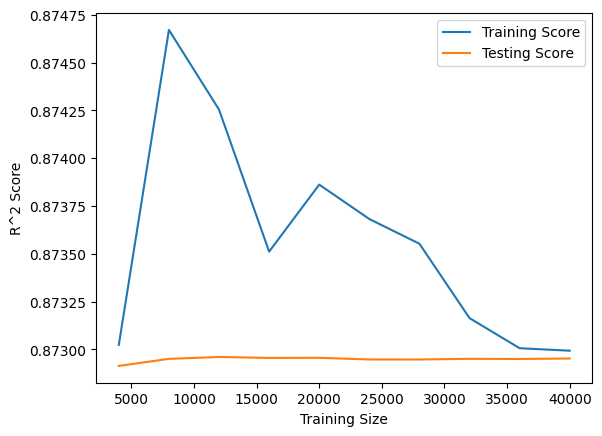

In [116]:

train_sizes, train_scores, test_scores = learning_curve(model, scaledX, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')

plt.plot(train_sizes, test_scores_mean, label='Testing Score')

plt.xlabel('Training Size')

plt.ylabel('R^2 Score')

plt.legend()

plt.show()

### Interpretation

The learning curve shows that the model's performance is decreasing as the number of training examples increases. This indicates that the model is underfitting, as the training score is significantly lower than the testing score.


<h2 align = center> <font color = "#D300F0"> Conclusion </h2>

In summary, Holdout Method, K-Fold Cross-Validation, Stratified K-Fold Cross-Validation, and Leave One Out Cross-Validation are popular techniques for evaluating the performance of machine learning models. By using these methods, you can ensure that your model is not overfitting or underfitting and provides a reliable and robust estimate of its performance. Additionally, you can use techniques like residual plots and learning curves to detect and prevent overfitting and underfitting.